# overview
This is a notebook created to save my notes of the NLP first course in the NLP specialization offered by DeepAI in coursera.

## simple feature extraction techniques
The most important step is to convert the string representations to numerical features. 
### Vocabulary and occurrence matrices
One way to acheive that is to build a vocabulary. Each pice of text is preprocessed and then tokenized into words and represented as a vector of length $n$ where $n$ is the vocabulary's size. The $i$-th value is either $1$ or $0$ depending whether the $i$-th word in the vocabulary appears in the piece of text or not. 
#### Issues
Such representations comes with a number of limitations as each piece of text will be represented with $|V|$ features. A large number comes affects computational requirements as well as performance. Additionally, this representations is fairly sparse: with a significant number of zero entries.
### Vocabulary and class frequencies
Among the ways to improve the previous model, is to take into account the frequency of each word in each of the classes. Thus, each unique "term" in the vocabulary will be associated with $n$ numbers, where the $i$-th number is frequency of the term in texts assigned to the $i$-th class. At this point, each piece of text has at least $n$ features.

## Simple processing techniques:
before extracting feature out of text presentations, Texts should be preprocessed even further to improve the efficiency and potential of the extraction techniques. Among such preprocessing techniques, I can mention: 
1. eliminating stop words: such words vary from one context to another. The list generally includes ponctuation marks, prepositions, basic verbs such as "to be", "to do"...
2. stemming words: reduce a term to a set of characters from which a term and its derivatives can be derived. build, builder, building: all can be reduced to build.
3. consider a unifrom representation: reducing unnecessary spaces, convert to lowercase...

In [ ]:
## applying what has been taught so far.
import nltk 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd


# download the twitter dataset included in the library
nltk.download("twitter_samples")

In [ ]:
pos_t = twitter_samples.strings("positive_tweets.json")
neg_t = twitter_samples.strings("negative_tweets.json")

print(type(pos_t))
print(len(pos_t))
for text in pos_t[:10]:
    print(text)


In [ ]:
# download the stopwords from NLTK
nltk.download('stopwords')

In [ ]:
import re                                 
import string                              
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet = pos_t[2277] # an example complicated enough to work

In [ ]:
print('\033[92m' + tweet)
print('\033[94m')
# using regex to replace the old style retweet 
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

In [ ]:
# instantiate tokenizer class: a module tokenizing tweets
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)

In [ ]:
stopwords_english = stopwords.words('english')
stopwords_russ = stopwords.words('russian')
print(stopwords_russ)

In [ ]:
real_tokens = [w for w in tweet_tokens if w not in stopwords_english and w not in string.punctuation] # only consider words that are neither stop words, nor ponctuations
# the code written so far can be gather into a single function

def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


In [ ]:
random_t = random.choice(neg_t)
tweets_stem = process_tweet(random_t)
print(tweets_stem)

## Vector Spaces
Vector spaces are mathematical representations that are capable of identifying the general context of text and making decision based on similarity between different terms. Vector spaces are numerical representations that can to some extent refect such facts:
1. certain words structures tend to be clustered together: adverbs near verbs
2. antonyms and synonyms tend to be clustered together while having relatively similar meanings

Vector spaces will be abbreviated as VS in the rest of the notebook.

### Word To Word VS
Initially setting a predefined value $k$, we can create a co-occurence matrix where the words in the vocabulary are listed on both axis and the $(i, j)$ cell represents the number of times the $i$-th and $j$-th words occured together within a distance less than $k$. Adjacent words are considered to have a distance $1$
### Word to Document VS
Assuming a set of documents (topic-specific vocabularies roughly speaking), the a matrix with columns as the topics and rows as the terms in the vocabulary and each cell represents the word's occurrence in the corresponding document.

VS are tighly tied to the notion of similarity. Among the techniques to quantify similarity: 
1. euclidean distance
2. cosine similarity: calculate the cos of the angle between a and b: $cos(90 \degree) = 0$ and two orthogonal vectors as dissimilar as they possibly can. Collinear vectors on the other hand are as similar as they can get. In other words, the closer $cos\_sim(a, b)$ the more similar the two vectors are.

Such representations can be used to deduce relations between terms. Assuming we have a dataset  with countries and capital and each word in the dataset is represented by a vector. The relationship between a country and its capital can be represented as a statistics of the set of difference vectors between the vectors of capitals and vectors of countries. 
Denoting the latter as $V$, then if we have a country represented with a vector $c$ then the predicted capital of that country is most similar vector to $V + c$

In [42]:
# set the file location
import os
embeddings = os.path.join("data", "word_embeddings_subset.p")

In [43]:
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load(open(embeddings, "rb" )) # this file represents a number of words as a vector.
# print(list(word_embeddings.keys())) # each of these string is represented as vector.
def vec(string: str):
    assert string in word_embeddings
    return word_embeddings[string] 

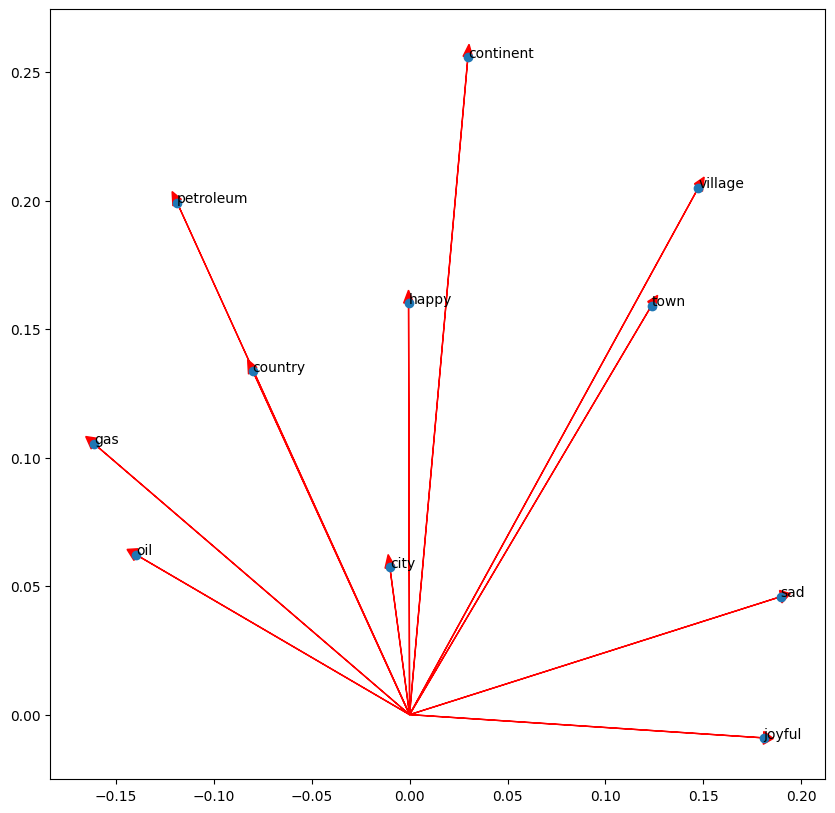

In [48]:
import seaborn as sns

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
bag2d = np.array([vec(w) for w in words])

# print(bag2d)

# bag2d = pd.DataFrame(bag2d, columns=words)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 0 # Select the column for the x axis
col2 = 1 # Select the column for the y axis

for word in bag2d:
    # create an arrow from (0, 0) (word_[col1], world_[col2]): 
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5) 
    

ax.scatter(bag2d[:, col1], bag2d[:, col2]) # 

for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()

In [49]:
print(np.linalg.norm(vec('town'))) # Print the norm of the word town
print(np.linalg.norm(vec('sad'))) # Print the norm of the word sad

2.3858097
2.9004838


In [51]:
keys = word_embeddings.keys()
data = np.array([vec(k) for k in keys])

embedding = pd.DataFrame(data=data, index=keys)
# Define a function to find the closest word to a vector:

def find_closest_word(v, k = 1):
    # each row will represent the transpose of difference between a the input and the vector representing the word at that row
    diff = embedding.values - v 
    # it sufficies to multiply the difference array by itself element wise and sum along the ROWS (axis=1)
    # to obtain the norm squared of each difference
    delta = np.sum(diff * diff, axis=1)
    # find the index of the minimum difference
    i = np.argmin(delta)
    return embedding.iloc[i].name


In [57]:
embedding.head(10)
pred_country_madrid = vec('Italy') - vec('Rome') + vec('Madrid')
find_closest_word(pred_country_madrid)

'Spain'

# Introduction to Machine Translation


## Transforming word vectors
Among the most basic techniques for machine translation is transforming word vectors from one language to another. Assuming we have a vocabulary in one language $V_1$, we create the vocabulary in the destination language $V_2$. Afterwards, we create a word embedding in the first language $X_1$ and a second word embedding $X_2$ in the second language. We look for $R$ such that:
$\begin{align} X_1 \cdot R = X_2 \end{align}$
This equation might not have a solution. Then we consider the matrix $R$ that minimizes $|| X_1 \cdot R - X_2||_{F}^2$. Assuming the matrix $A$ can be written as: 
$\begin{align}
A = 
\begin{bmatrix} 
a_{11} & a_{12} & .. & .. & a_{1n} \\
a_{21} & a_{22} & .. & .. & a_{1n} \\
.. & .. & ..& .. \\
a_{m1} & a_{m2} & .. & .. & a_{mn}
\end{bmatrix}
\end{align}$ 
then
$\begin{align}
||A||_{F}^2 = \sum_{(i, j)} a_{ij}^2
\end{align}$ 
The optimal solution is found computationally using optimization algorithm such as gradient descent.

### After finding R
After finding $R$, The result $X_1 \cdot R$ might not correspond to an exact word in $X_2$. For better performance, clustering/grouping data is needed.
#### a Math break
Assuming a hyperplane in $\mathbb{R}^n$ defined by a normal vector $P$, then we can define the relative position of a vector with respect to the plane as follows:
1. $P \cdot x^T > 0 \implies x $ is on the upper side of the plane 
2. $P \cdot x^T < 0 \implies x $ is on the lower side of the plane
3. $P \cdot x^T = 0 \implies x $ is on the plane

Having such classification mechanism in mind, we can use multiple planes to divide the space into $k$ planes and assign a value of each of the generated regions. Assuming the existence of $r$ regions, then vector can be assigned a hash value as follows:
$\begin{align} 
H(x) = \sum_{i=0} ^ {r-1}  h_i(x) \cdot 2^i
\end{align}$
where $h_i(x) = P_i \cdot x^T \geq 0$ 